In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### PREPROCESSING

Loading dataset 

In [2]:
data=np.load(r"C:\Users\HP.HP-PC\dataset.npz")
data_X=data['variables']
data_X=data_X[:,0:35]
data_Y=data['parameters']
data_Y=data_Y[:,0:1]

Creating input and output vectors X and Y

In [3]:
X=data_X
Y=data_Y

In [ ]:
for i in range(X.shape[0]):
    if False in ~np.isnan(X[i]):
           np.delete(X,i,axis=0)

In [ ]:
~np.isnan(X)

Creating output vector in form of muon momenta normalised for GeV 

In [30]:
for i in range(len(Y)):
    Y[i]=((Y[i]/(1.60217662*(10**(-19)))**(-1)))*(3*(10**8)/(10**6))/(1.6*(10**(-19)))
    if Y[i]<0:
        Y[i]=Y[i]*(-1)

Removing NaN values and infinite values from input and output

In [46]:
for i in X:
    i = i[~np.isnan(i)]
    ii = np.isfinite(i)
    i = i[ii]

One Hot Encoding muon momenta into 4 absolute ranges

In [6]:
for i in range(len(Y)):
    if Y[i]>0 and Y[i]<10:
        Y[i]=1.0
    elif Y[i]>10 and Y[i]<30:
        Y[i]=2.0
    elif Y[i]>30 and Y[i]<100:
        Y[i]=3.0
    elif Y[i]>100:    
        Y[i]=4.0

Verifying input data and output data dimensions

In [7]:
print("No. of data points -",X.shape[0],"\t","No. of features -",X.shape[1])
print("No. of output values -",Y.shape[0])

No. of data points - 3272341 	 No. of features - 35
No. of output values - 3272341


Plotting the data points to visualise the clusters for some features

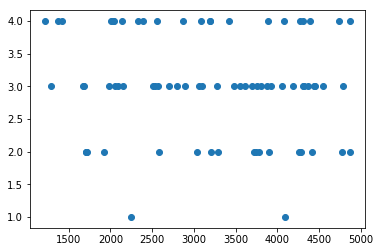

In [17]:
plt.scatter(X[0:100,2],Y[0:100])

Splitting data for training and testing

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=1)

In [10]:
model=Sequential()
model.add(Dense(35, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=2)
_, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
 - 143s - loss: nan - accuracy: 0.0000e+00
Epoch 2/100


KeyboardInterrupt: 